In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('height-weight.csv')

In [12]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


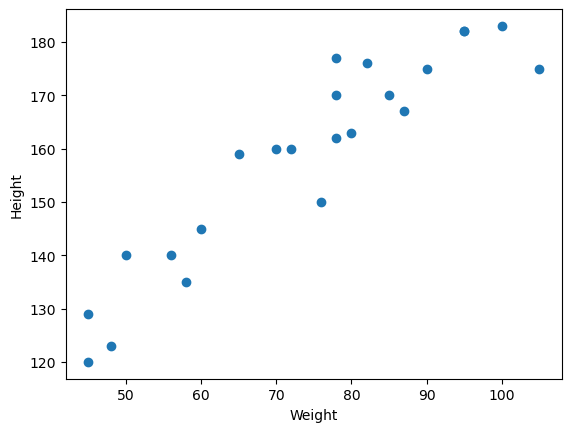

In [20]:
## Scatter plot  -->  To observe the correaltion between the data
plt.scatter(df["Weight"],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [22]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


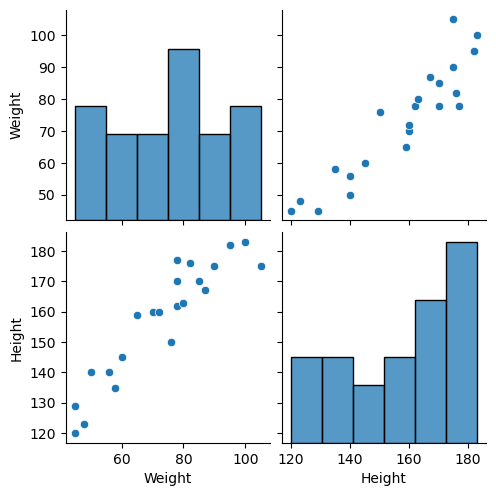

In [30]:
## seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [85]:
## Indepenent and dependent features
# X = df['Weight']  # --> this is a series (Collection of single record)

X = df[["Weight"]]  # --> this is a dataframe
y = df['Height']
### we should make sure that our independent feature should be in dataframe or 2D- array
### our dependent feature could be in series or 1D-array
np.array(X).shape


(23, 1)

In [87]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42 )

In [89]:
X_train.shape

(17, 1)

In [91]:
## Standardization 
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# why in X_train we use fit_transform and in test we use transform only?
avoiding data leakage from your test set into your training process.

fit() calculates the statistics: When you use scaler.fit(X_train), 
the StandardScaler object learns the scaling parameters (mean and standard deviation) 
specifically from your training data (X_train). It calculates the mean and standard deviation of each feature in X_train.

transform() applies the scaling: 1  The transform() method then 
uses the scaling parameters (mean and standard deviation) that were learned during the fit() step 
to apply the standardization to the data you provide.   

Why not fit_transform on the test data (X_test)?

The key reason is to simulate a real-world scenario where you train your model on historical data (the training set) 
and then evaluate its performance on new, unseen data (the test set). 
You should not use any information from the test set during the training phase.


In [96]:
X_test = scaler.transform(X_test)

In [98]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [100]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [102]:
regression = LinearRegression()

In [104]:
regression.fit(X_train,y_train) # X_train parameter only accepts the Dataframe or 2D-array 

LinearRegression()

In [114]:
print("Coefficient or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


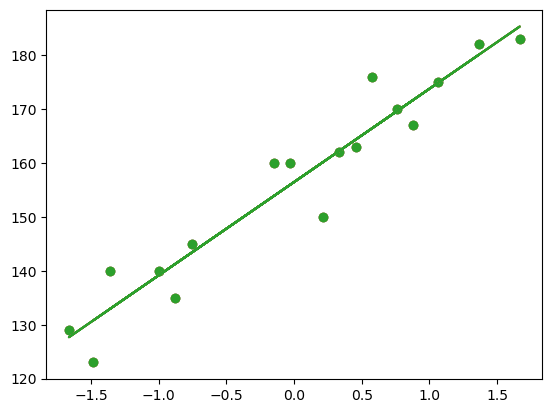

In [127]:
## plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [129]:
## Prediction for the test data
y_pred = regression.predict(X_test)

In [131]:
## Perfomance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [135]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [137]:
from sklearn.metrics import r2_score

In [139]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [141]:
## OLS Linear Regression
import statsmodels.api as sm

In [143]:
model = sm.OLS(y_train,X_train).fit()

In [147]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [149]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 01 May 2025   Prob (F-statistic):                       0.664
Time:                        15:28:25   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/nikeshgamal/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [155]:
### Prediction for new data
regression.predict(scaler.transform([[72]]))

/home/nikeshgamal/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])